# Theory
1. Problem: Estimate why do cactai grow in the parts of the desert. We don't really know what distinguishes high and low growth clusters. What is the ML system most suitable for the problem?

Approaching this problem, I would first try an unsupervised clustering algorithm and see if that works to distinguish the data into something usable. If you have some partially labeled training data semi-supervised learning might be more useful. 

2. How can the lack of validation set create a bias in the fit measurement?

Without validation you can get hyperparameters that are over tuned to the training data set which would results in overfitting in the model on the training set. You could also have an insufficient amount of data so the model doesn't learn properly on the training set and you won't know until you try it on the test data.  

3. How can we reduce overfitting?

Get more data
Reduce noise in the training data 
Simplify the model by selecting one with fewer parameters, by reducing the number of attributes in the training data or by constraining the model. 

# Practice

In [2]:
# Run only once it will move work directory to  folder up. Use if needed.
import os
os.chdir('..')

In [3]:
#Set Path to place on computer where files are stored
os.chdir("C:/Users/markb/Documents/Fall 2018/Machine Learning/ML JHU/ML JHU")
print(os.getcwd())

C:\Users\markb\Documents\Fall 2018\Machine Learning\ML JHU\ML JHU


In [5]:
#1. Load dataset oecd_bli
import os
import pandas as pd
datapath = os.path.join("datasets", "lifesat", "" )
print(datapath)
datapath = os.path.join("datasets", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(10)

datasets\lifesat\


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


1 Plot the relationship Linear model predicting 'Life satisfaction' using 'Self-reported health' .

Indicator       Life satisfaction  Self-reported health
Country                                                
Australia                     7.3                  85.0
Austria                       6.9                  69.0
Belgium                       6.9                  74.0
Brazil                        7.0                  69.0
Canada                        7.3                  89.0
Chile                         6.7                  59.0
Czech Republic                6.5                  60.0
Denmark                       7.5                  72.0
Estonia                       5.6                  54.0
Finland                       7.4                  65.0


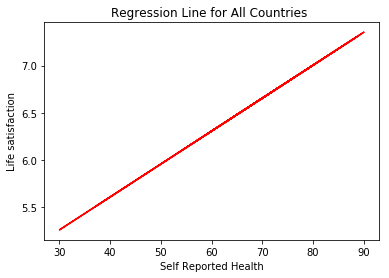

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
lin_reg = LinearRegression()


model_data = oecd_bli[['Life satisfaction','Self-reported health']]

#Drop the country Summary data
model_data=model_data.drop(index='OECD - Total')
print(model_data.head(10))


#Apparently this was unnecessary
#train_set, test_set = train_test_split(model_data, test_size=.2, random_state=42)

#train_set.plot(kind='scatter', x='Life satisfaction', y= 'Self-reported health')

#model_data.plot(kind='scatter', x='Life satisfaction', y= 'Self-reported health')

y=np.c_[model_data['Life satisfaction']]
x=np.c_[model_data['Self-reported health']]

lin_reg.fit(x,y)

b=(lin_reg.intercept_)
m=(lin_reg.coef_)


plt.plot(x, b+ m*x, 'r')
plt.ylabel('Life satisfaction')
plt.xlabel('Self Reported Health')
plt.title('Regression Line for All Countries ')
plt.show()



 2 Estimate and report relationship Linear model predicting  'Life satisfaction' using 'Self-reported health' .

In [5]:
lin_reg.fit(x,y)

Intercept= (lin_reg.intercept_)
Coefficent =(lin_reg.coef_)

print("The estimated model is y^hat =", + Intercept, "x*", + Coefficent)

The estimated model is y^hat = [4.21475278] x* [[0.03487481]]


3 Plot regression line and scatter plot together

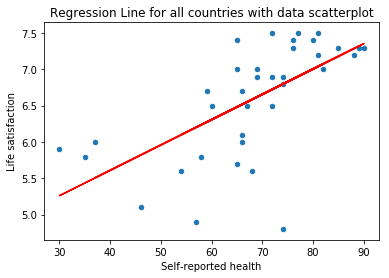

In [6]:
model_data.plot(kind='scatter', y='Life satisfaction', x= 'Self-reported health')
plt.plot(x, b + m*x, 'r')
plt.title('Regression Line for all countries with data scatterplot')
plt.show()

4 Drop all countries with the letter 'R' in the name and reestimate the relationship between  life satisfaction and Self-reported health.

In [7]:
index1=model_data.index

letter = set("rR")

contains_r=[word for word in index1 if any(letter in word for letter in 'rR')]# Sort out countries that contain the letter r
cleaned = [word for word in index1 if word not in contains_r] #Filter index to remove countries that contain the letter r
new_data=model_data.loc[cleaned] #new data set to run the model on
#print(new_data.head)
#print(cleaned)



#train_set_new, test_set_new = train_test_split(new_data, test_size=.2, random_state=42) #Set new data training and test sets


y_new=np.c_[new_data['Life satisfaction']]
x_new=np.c_[new_data['Self-reported health']]

lin_reg.fit(x_new,y_new) #Fit the regression

b_new=(lin_reg.intercept_) #Regression intercept
m_new=(lin_reg.coef_) #Regression Coefficient 


Intercept= (lin_reg.intercept_)
Coefficent =(lin_reg.coef_)

print("The estimated model with out the countries with the letter R is y^hat =", + Intercept, "x*", + Coefficent)

The estimated model with out the countries with the letter R is y^hat = [4.50075681] x* [[0.03112626]]


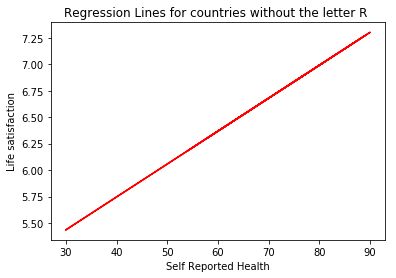

In [8]:

plt.plot(x_new, b_new+ m_new*x_new, 'r') #Plot the new regression
plt.title('Regression Lines for countries without the letter R ')
plt.ylabel('Life satisfaction')
plt.xlabel('Self Reported Health')
plt.show()

5 Plot regression lines for all countries and countries with no R

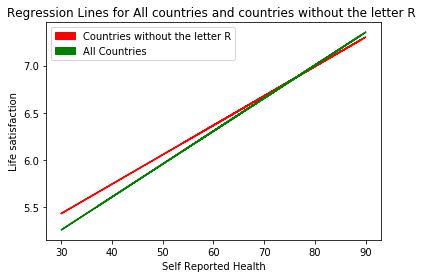

In [9]:
import matplotlib.patches as mpatches
plt.plot(x_new, b_new+ m_new*x_new, 'r' ) #Countries without R regression
plt.plot(x, b + m*x, 'g') #all countries regression
plt.title('Regression Lines for All countries and countries without the letter R ')
red_patch = mpatches.Patch(color='red', label='Countries without the letter R')
green_patch = mpatches.Patch(color='green', label ='All Countries')
plt.legend(handles=[red_patch,green_patch])
plt.ylabel('Life satisfaction')
plt.xlabel('Self Reported Health')
plt.show() #look at this beautiful piece of artwork 